#Customer Clustering

Imports:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Loading the dataset

In [ ]:
customer_info = pd.read_csv('segmentation data.csv')
customer_info.sample(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
731,100000732,0,0,21,0,65827,0,0
1126,100001127,0,0,42,1,135493,1,2
1327,100001328,1,1,25,1,61907,0,0
1586,100001587,1,1,34,1,125351,1,0
209,100000210,0,0,55,1,157940,1,2


In [ ]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
num_columns = ['ID', 'Age', 'Income']
cat_columns = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

customer_info[cat_columns] = customer_info[cat_columns].astype('str')

In [ ]:
customer_info.describe(include='object').T

,count,unique,top,freq
Sex,2000,2,0,1086
Marital status,2000,2,0,1007
Education,2000,4,1,1386
Occupation,2000,3,1,1113
Settlement size,2000,3,0,989


In [ ]:
customer_info.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0


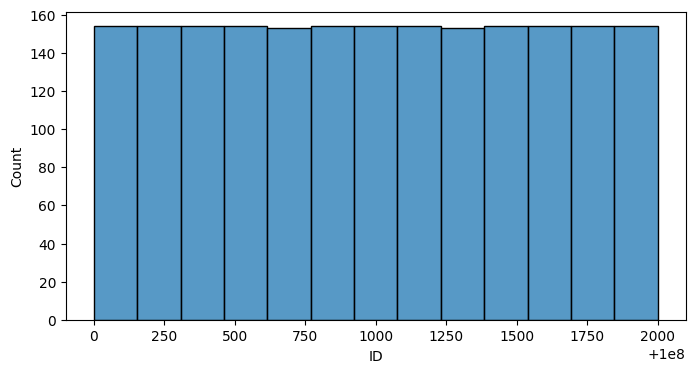

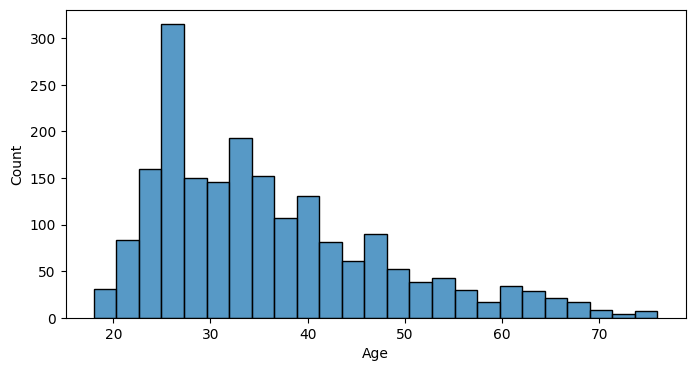

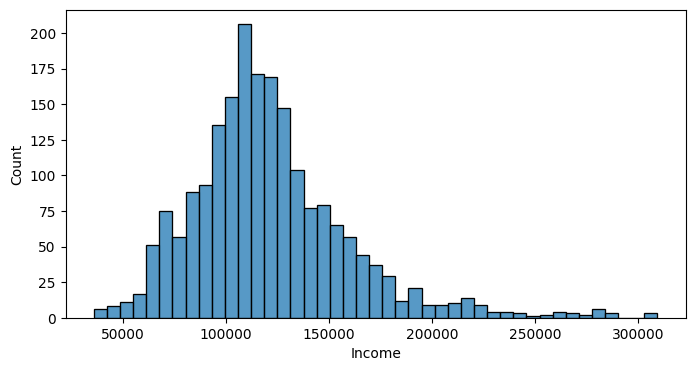

In [ ]:
for numerical in num_columns:
  plt.figure(figsize=(8,4))
  sns.histplot(data=customer_info, x=numerical)
  #plt.savefig(numerical + '.png')

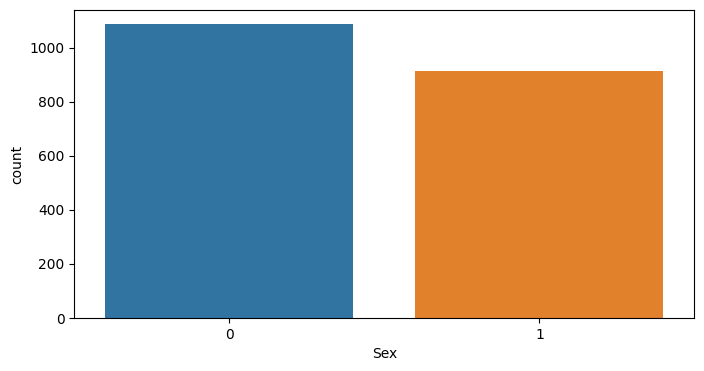

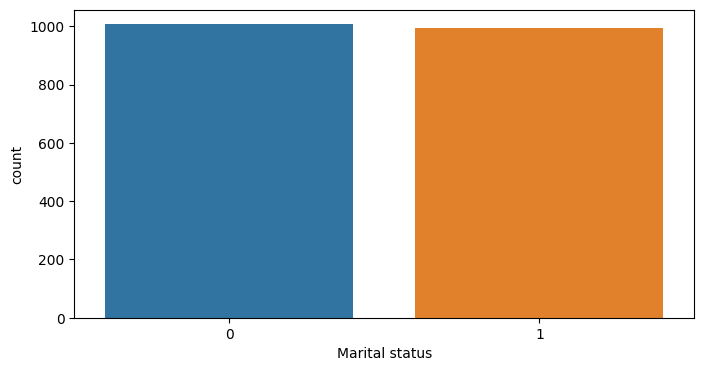

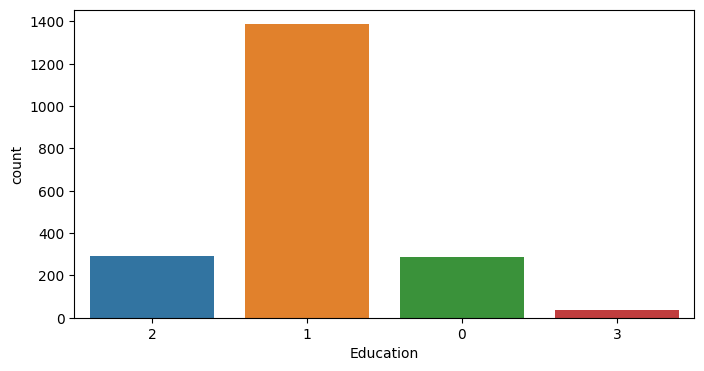

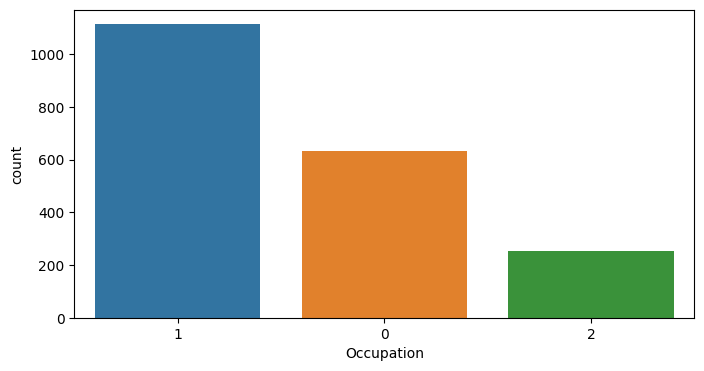

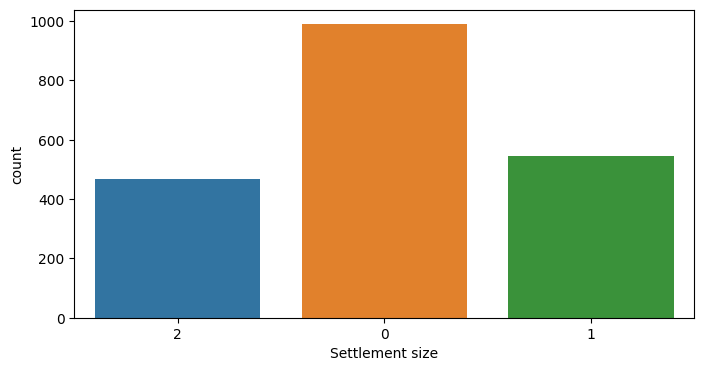

In [ ]:
for category in cat_columns:
  plt.figure(figsize=(8,4))
  sns.countplot(data=customer_info, x=category)

<Axes: xlabel='Age', ylabel='Income'>

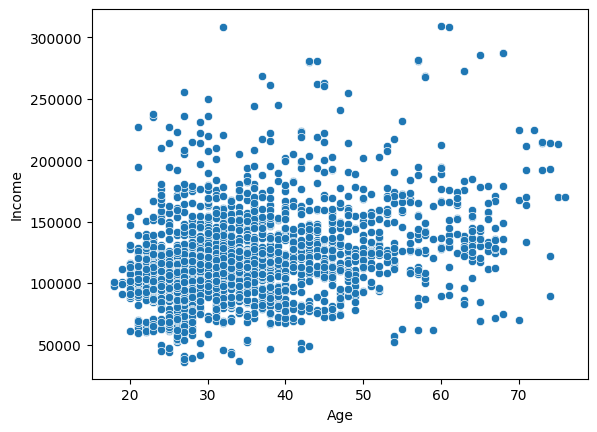

In [ ]:
sns.scatterplot(x='Age', y='Income', data=customer_info)

In [ ]:
import scipy.stats as stats
print(stats.pearsonr(customer_info['Age'], customer_info['Income'] ))

PearsonRResult(statistic=0.34061016373173514, pvalue=1.6443825442386822e-55)


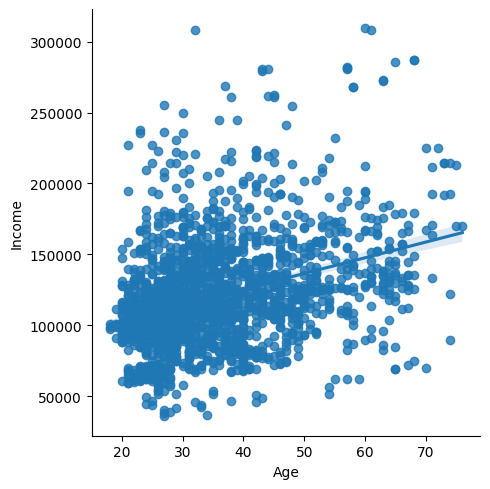

In [ ]:
sns.lmplot(x='Age', y='Income', data=customer_info)

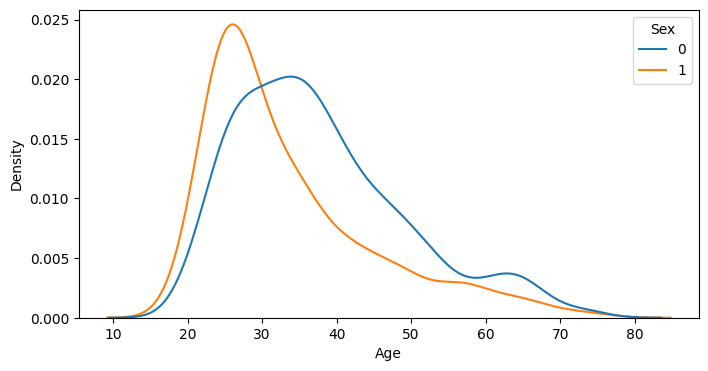

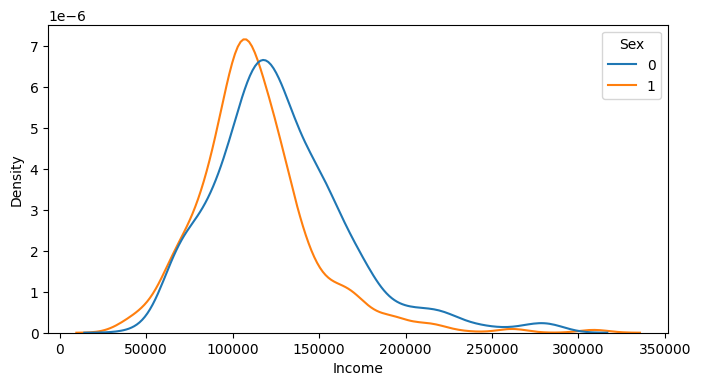

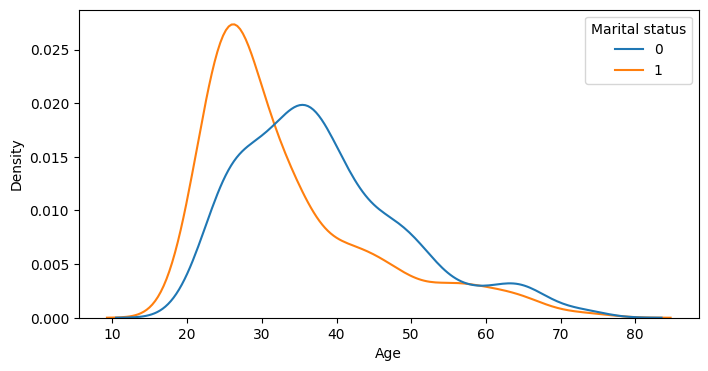

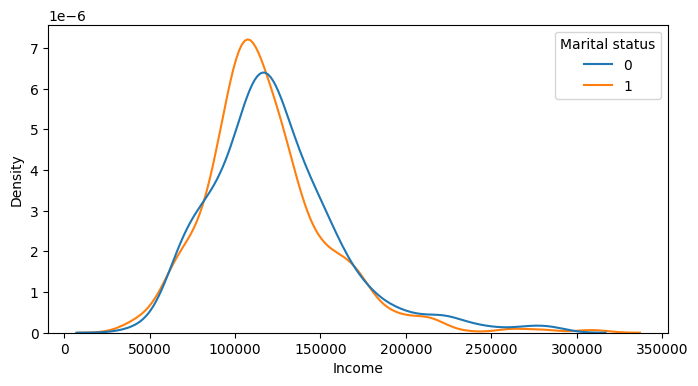

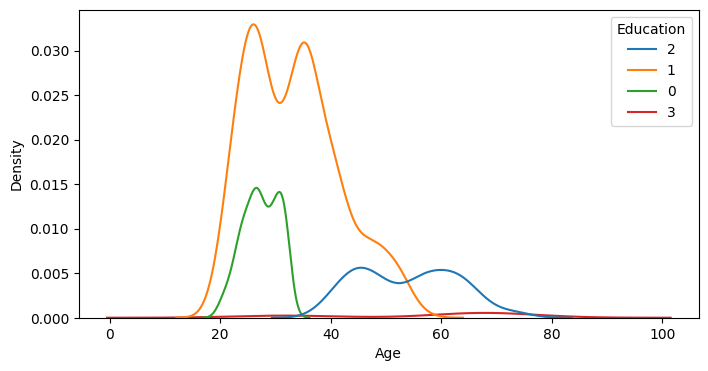

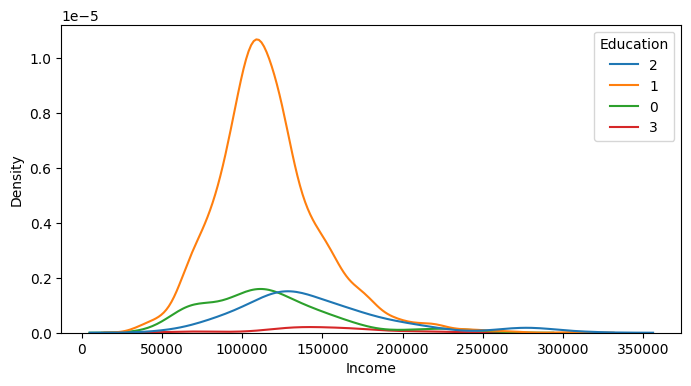

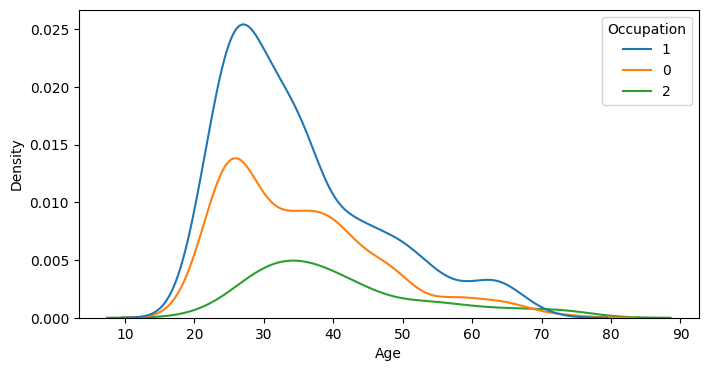

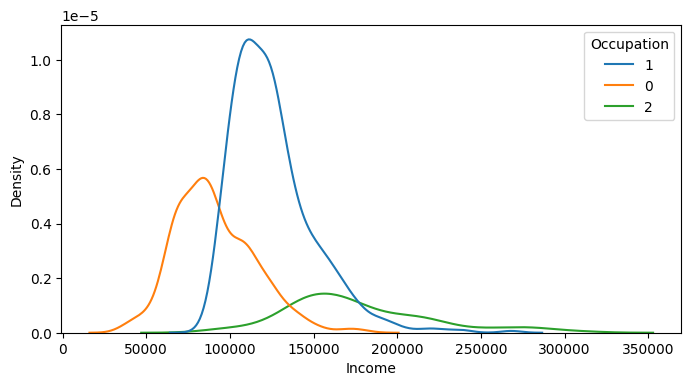

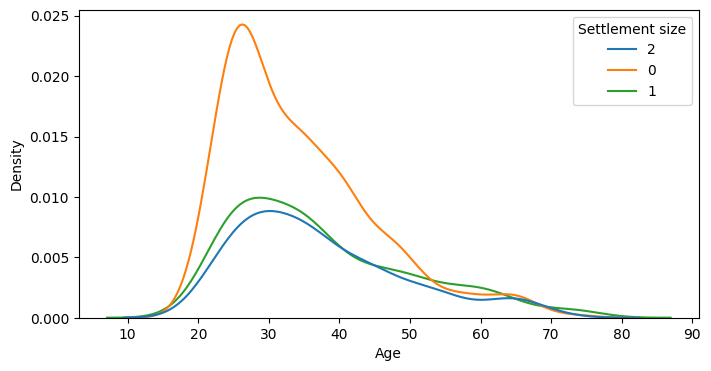

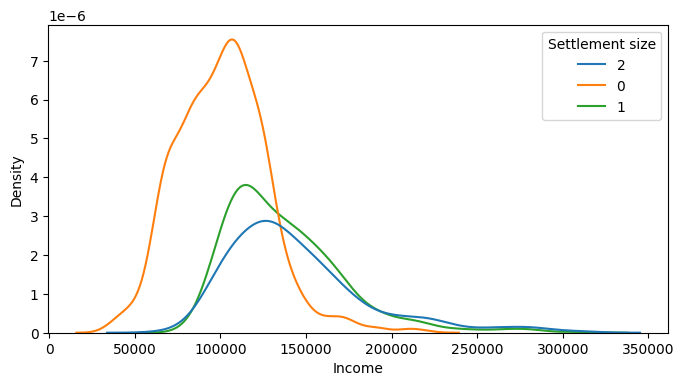

In [ ]:
for category in cat_columns:
  for numerical in num_columns:
    if numerical != 'ID' :
      plt.figure(figsize=(8,4))
      sns.kdeplot(data=customer_info, x=numerical, hue=category)

In [ ]:
cat_columns

['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

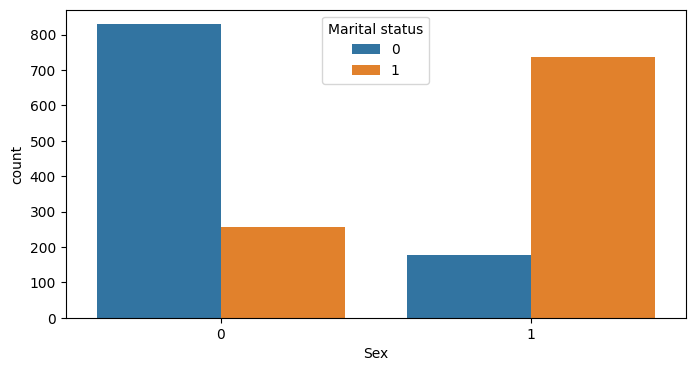

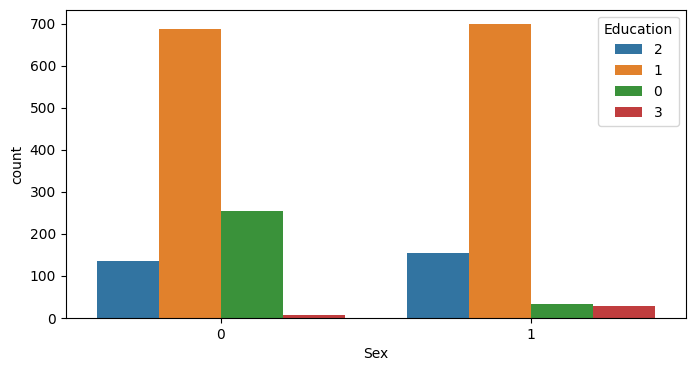

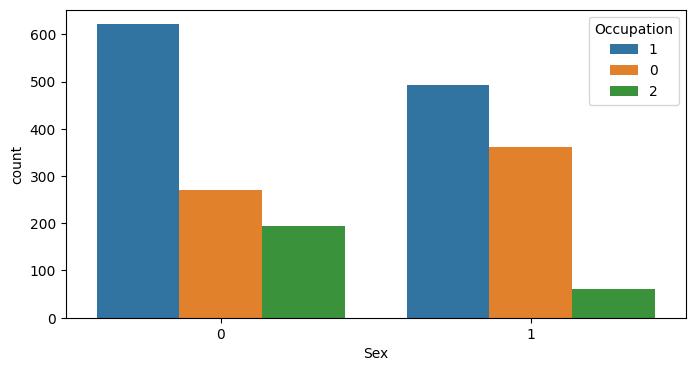

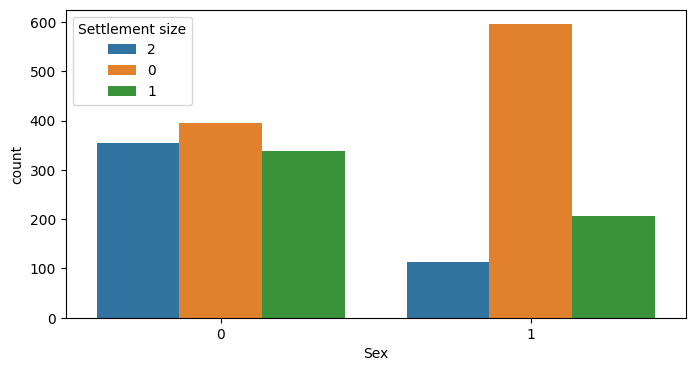

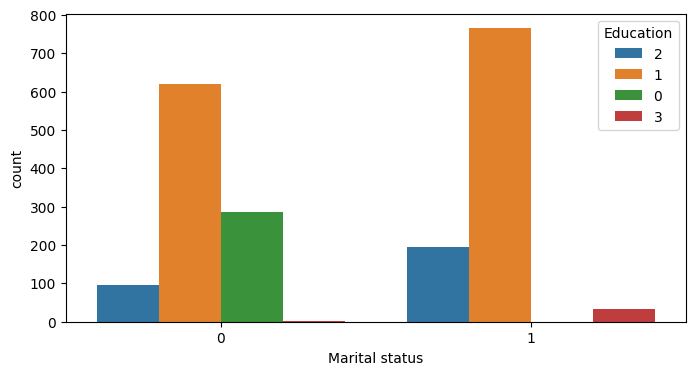

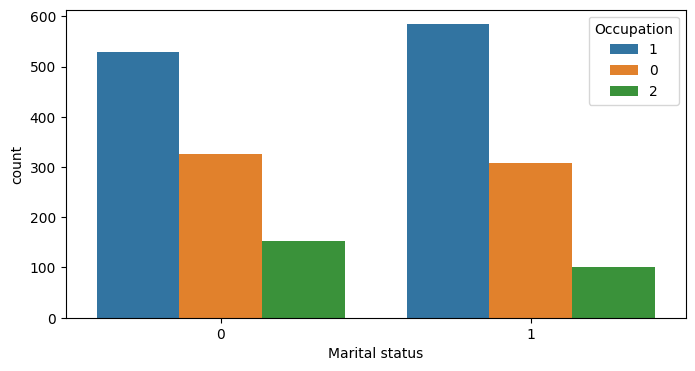

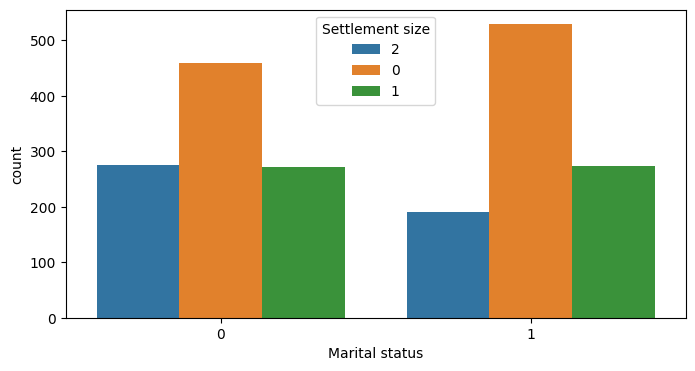

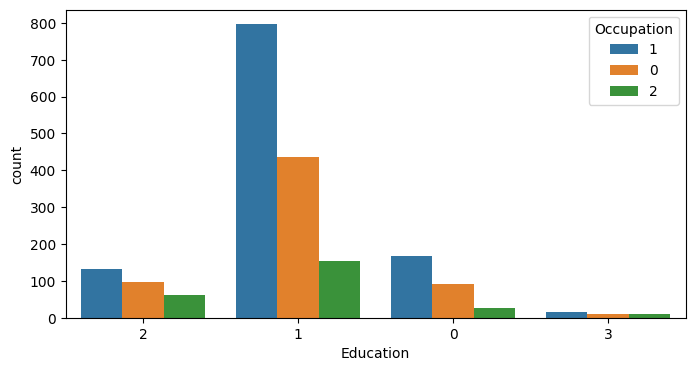

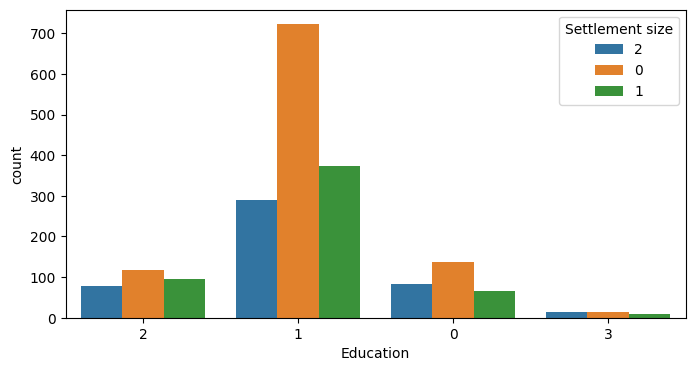

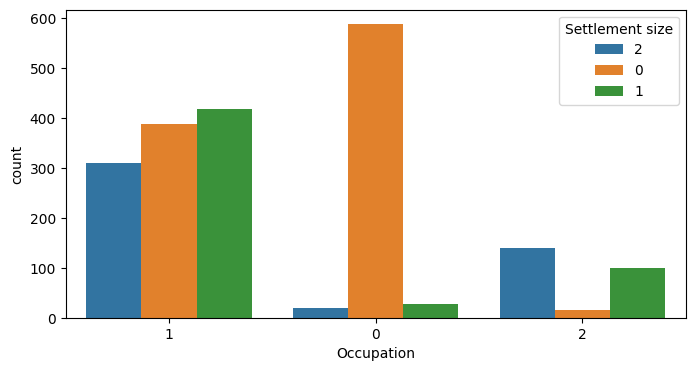

In [ ]:
cat_aux = cat_columns.copy()
for category1 in cat_columns:
    cat_aux.pop(0);
    for category2 in cat_aux:
        if category1 != category2:
            plt.figure(figsize=(8,4))
            sns.countplot(data=customer_info, x=category1, hue=category2)

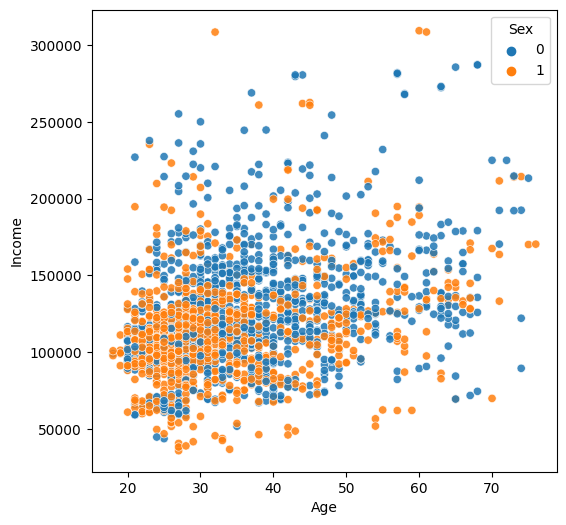

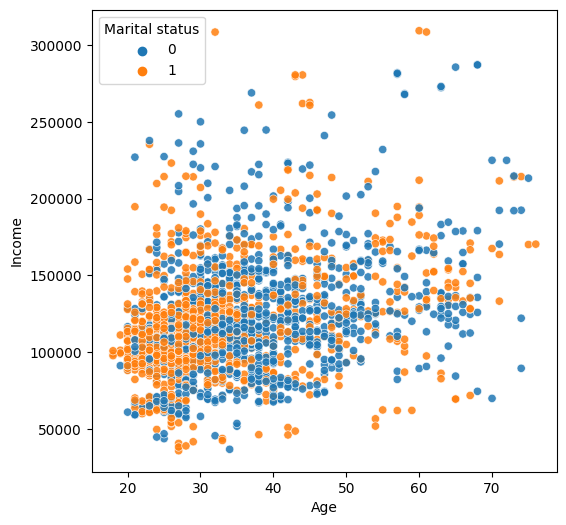

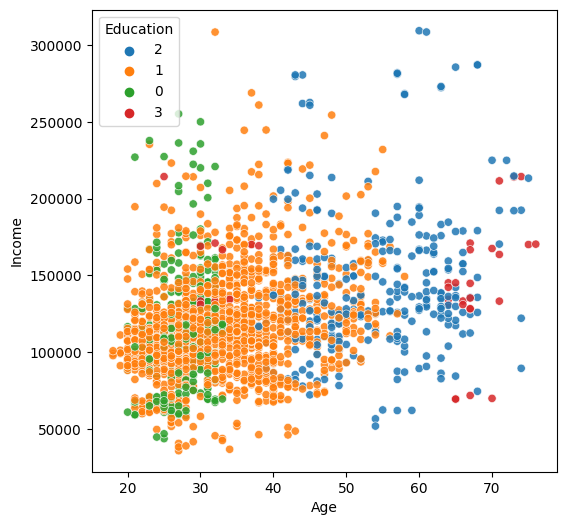

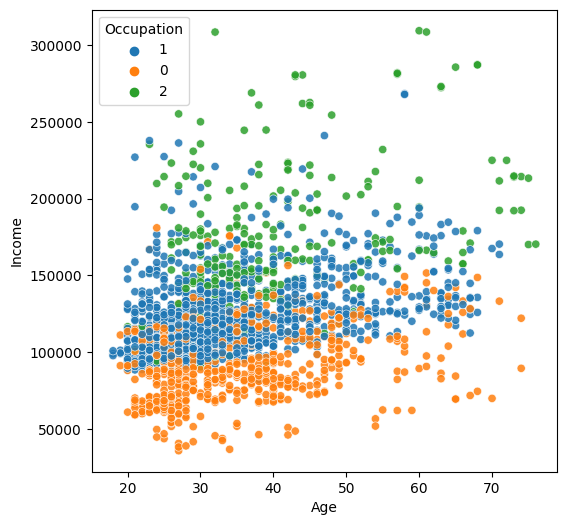

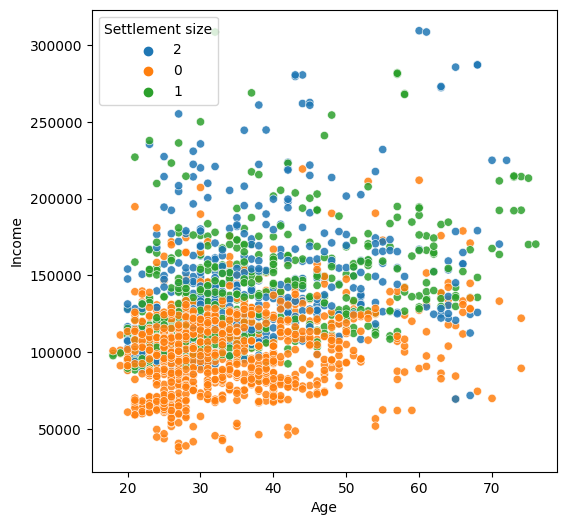

In [ ]:
def bivariate_scatter(x, y, hue, df):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=0.85)
for cat in cat_columns:
    bivariate_scatter('Age', 'Income', cat, customer_info)

In [ ]:
from scipy import stats

normaltest_result_income = stats.normaltest(customer_info['Income'])[1]
normaltest_result_age    = stats.normaltest(customer_info['Age'])[1]

print(f'The p-value for the null hypothesis of the Income being Normally distributed is {normaltest_result_income}')
print(f'The p-value for the null hypothesis of the Age    being Normally distributed is {normaltest_result_age}')

The p-value for the null hypothesis of the Income being Normally distributed is 2.5009638879187734e-98
The p-value for the null hypothesis of the Age    being Normally distributed is 3.3428344869999675e-56


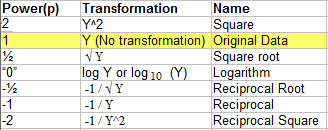

In [ ]:
from sklearn.preprocessing import PowerTransformer

def apply_log(column):
    return np.log(column)

def normality_test(column):
    return stats.normaltest(column)

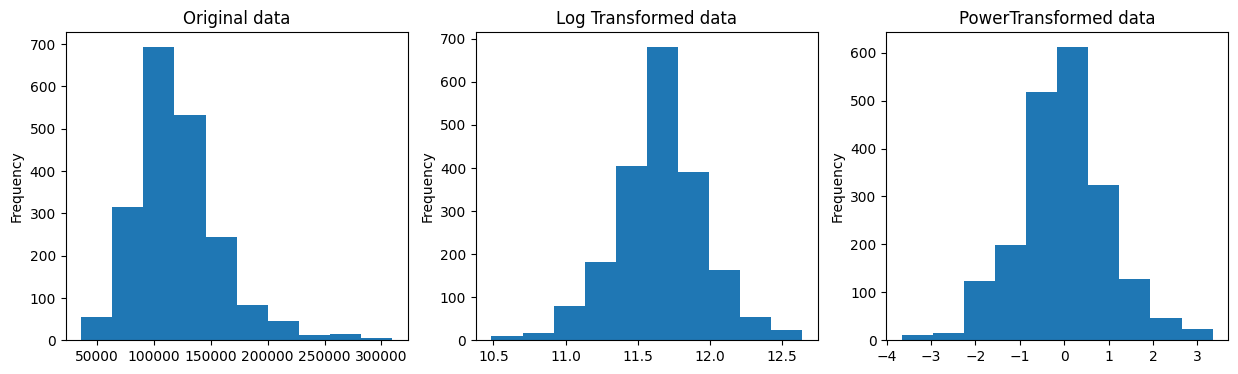

In [ ]:
# PowerTransform data
feature = customer_info['Income'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature)
array_1d = feature_transf.flatten()
feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_income = apply_log(customer_info['Income'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4));
# Plot original data & get metrics
customer_info['Income'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(customer_info['Income'])

# Plot log transformed data & get metrics
log_transformed_income.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_income)

# Plot power transformed data & get metrics
feature.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])

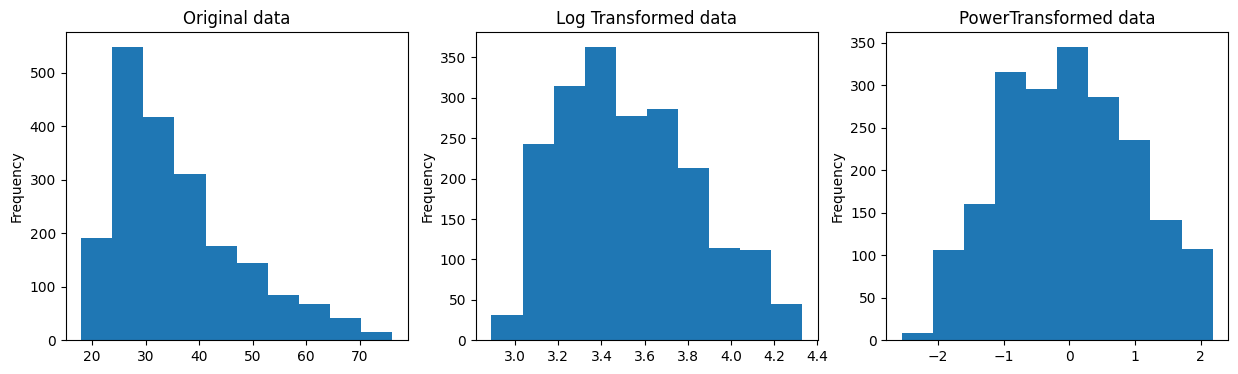

In [ ]:
# PowerTransform data
feature2 = customer_info['Age'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature2)
array_1d = feature_transf.flatten()
feature2 = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_age = apply_log(customer_info['Age'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4));
# Plot original data & get metrics
customer_info['Age'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(customer_info['Age'])

# Plot log transformed data & get metrics
log_transformed_age.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_age)

# Plot power transformed data & get metrics
feature2.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature2)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])

In [ ]:
metrics

,statistic,pvalue
Original data,255.475892,3.342834e-56
Log transform,111.094201,7.519703e-25
PowerTransformer,161.196197,9.924088e-36


In [ ]:
customer_info['transf_income'] = feature
customer_info['transf_age']    = log_transformed_age

In [ ]:
customer_transformed = customer_info.drop(['Income', 'Age', 'ID'], axis=1)
customer_transformed

,Sex,Marital status,Education,Occupation,Settlement size,transf_income,transf_age
0,0,0,2,1,2,1.918999,4.204693
1,1,1,1,1,2,-1.606785,3.091042
2,0,0,1,0,0,1.170493,3.891820
3,0,0,1,1,1,0.938565,3.806662
4,0,0,1,1,1,1.373017,3.970292
...,...,...,...,...,...,...,...
1995,1,0,1,0,0,1.058615,3.850148
1996,1,1,1,1,0,-0.756723,3.295837
1997,0,0,0,0,0,-0.242135,3.433987
1998,1,1,1,0,0,-1.232304,3.178054


In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(customer_transformed)


In [ ]:
X[0]

array([0.        , 0.        , 0.66666667, 0.5       , 1.        ,
       0.94498487, 0.91249369])

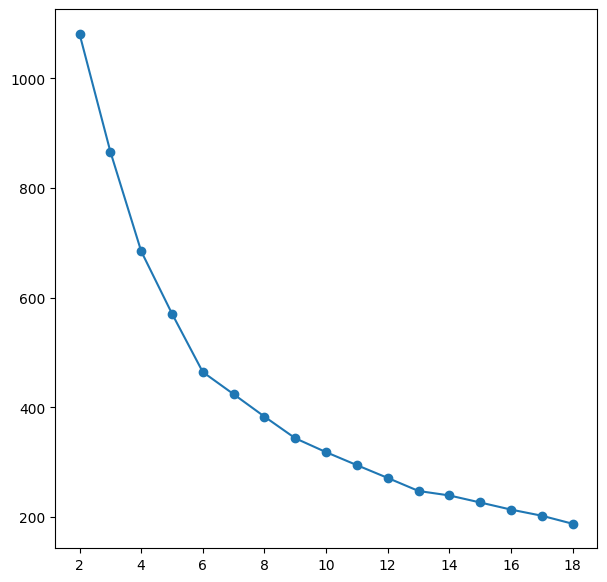

In [ ]:
from sklearn.cluster import KMeans
clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

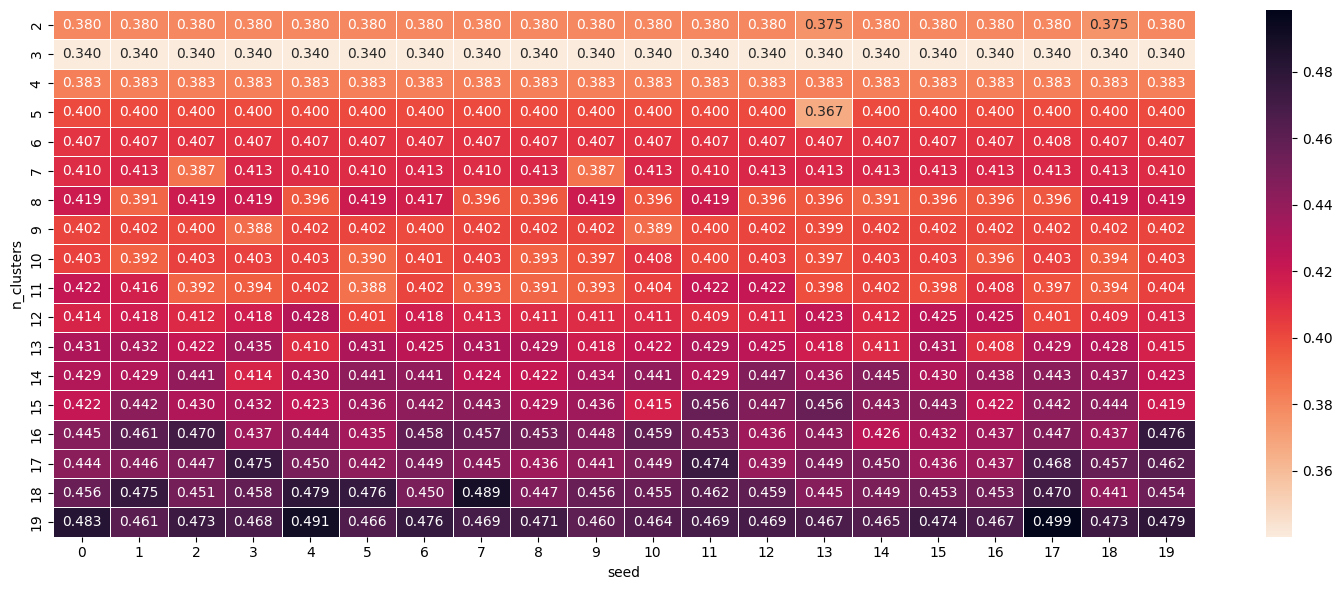

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range=range(2, 20)
random_range  =range(0, 20)
results=[]

for c in clusters_range:
    for r in random_range:
        clusterer=KMeans(n_clusters=c, random_state=r)
        cluster_labels=clusterer.fit_predict(X)
        silhouette_avg=silhouette_score(X, cluster_labels)
        results.append([c,r,silhouette_avg])

result  =pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km=pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

Dari grafik yang ditunjukkan di atas, kita melihat bahwa ada spike Silhouette score untuk cluster 6 - 7 yang koheren dengan hasil yang kita dapatkan dari metode elbow. Hasil ini menunjukkan bahwa memilih 6 atau 7 cluster menghasilkan kelompok yang terpisah.

Kita putuskan untuk membuat 6 atau 7 cluster dan menggunakan business understanding kita untuk menentukan klasifikasi mana yang memberikan lebih banyak knowledge tentang customer. Pilihan lain adalah memilih 14 atau lebih, yang tidak realistis mengingat data tidak terlalu besar
PCA (Principal Component Analysis) adalah algoritma yang dapat mengurangi dimensi (dimensionality reduction). kita dapat memanfaatkan PCA untuk visualisasi data yang memiliki dimensi yang tinggi

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

In [ ]:
kmeans=KMeans(n_clusters=6, random_state=0).fit(X)

In [ ]:

labels = kmeans.labels_
X_pca_df['Labels'] = labels
X_pca_df.head()

,X1,X2,X3,Labels
0,0.870414,0.378747,0.598028,2
1,-0.583787,0.689711,-0.331484,4
2,0.531130,-0.663439,0.240717,0
3,0.721046,-0.045523,0.180673,2
4,0.742047,-0.038936,0.300202,2


In [ ]:
results_df = customer_info.drop(['ID', 'transf_income', 'transf_age'], axis=1)
results_df['Labels'] = kmeans.labels_
results_df = results_df.astype({'Sex':'int32', 'Marital status':'int32', 'Education':'int32', 'Occupation':'int32', 'Settlement size':'int32'})
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int32
 1   Marital status   2000 non-null   int32
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int32
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int32
 6   Settlement size  2000 non-null   int32
 7   Labels           2000 non-null   int32
dtypes: int32(6), int64(2)
memory usage: 78.2 KB


In [ ]:
kmeans=KMeans(n_clusters=6, random_state=0).fit(X)
labels = kmeans.labels_
X_pca_df['Labels'] = labels
X_pca_df.head()

,X1,X2,X3,Labels
0,0.870414,0.378747,0.598028,2
1,-0.583787,0.689711,-0.331484,4
2,0.531130,-0.663439,0.240717,0
3,0.721046,-0.045523,0.180673,2
4,0.742047,-0.038936,0.300202,2


In [ ]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int32
 1   Marital status   2000 non-null   int32
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int32
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int32
 6   Settlement size  2000 non-null   int32
 7   Labels           2000 non-null   int32
dtypes: int32(6), int64(2)
memory usage: 78.2 KB


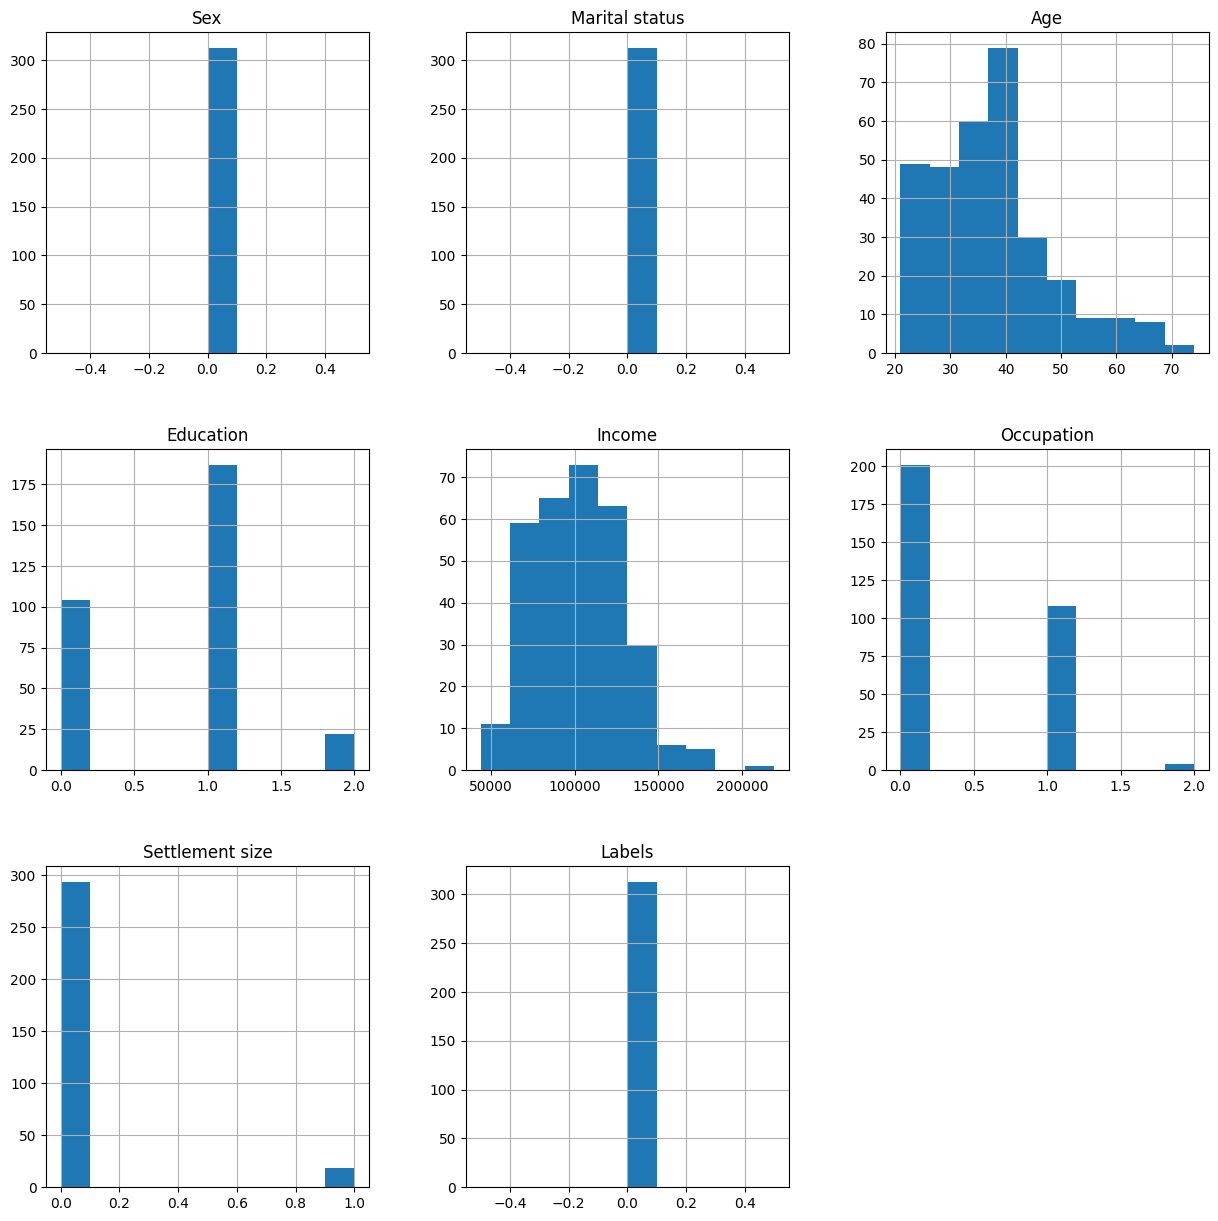

In [ ]:
results_df = customer_info.drop(['ID', 'transf_income', 'transf_age'], axis=1)
results_df['Labels'] = kmeans.labels_
results_df = results_df.astype({'Sex':'int32', 'Marital status':'int32', 'Education':'int32', 'Occupation':'int32', 'Settlement size':'int32'})
results_df.info()
summary = {}

for index in range(6):
    summary[index] = results_df[results_df['Labels'] == index].describe().T  # .describe method provides general statistics about the data
summary[0]
results_df[results_df['Labels'] == 0].hist(figsize=(15,15));

In [ ]:
summary[1]

,count,mean,std,min,25%,50%,75%,max
Sex,429.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Marital status,429.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,429.0,32.135198,10.572862,18.0,25.0,28.0,36.0,71.0
Education,429.0,1.202797,0.462007,1.0,1.0,1.0,1.0,3.0
Income,429.0,102282.832168,26273.566968,35832.0,86273.0,102250.0,120262.0,207262.0
Occupation,429.0,0.442890,0.511208,0.0,0.0,0.0,1.0,2.0
Settlement size,429.0,0.002331,0.048280,0.0,0.0,0.0,0.0,1.0
Labels,429.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [ ]:
summary[2]

,count,mean,std,min,25%,50%,75%,max
Sex,516.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
Marital status,516.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
Age,516.0,40.007752,11.956391,20.0,31.00,37.0,47.0,75.0
Education,516.0,0.821705,0.613120,0.0,0.00,1.0,1.0,2.0
Income,516.0,145325.602713,38308.258642,82398.0,119176.75,136317.5,159748.0,287247.0
Occupation,516.0,1.265504,0.483968,0.0,1.00,1.0,2.0,2.0
Settlement size,516.0,1.532946,0.503271,0.0,1.00,2.0,2.0,2.0
Labels,516.0,2.000000,0.000000,2.0,2.00,2.0,2.0,2.0


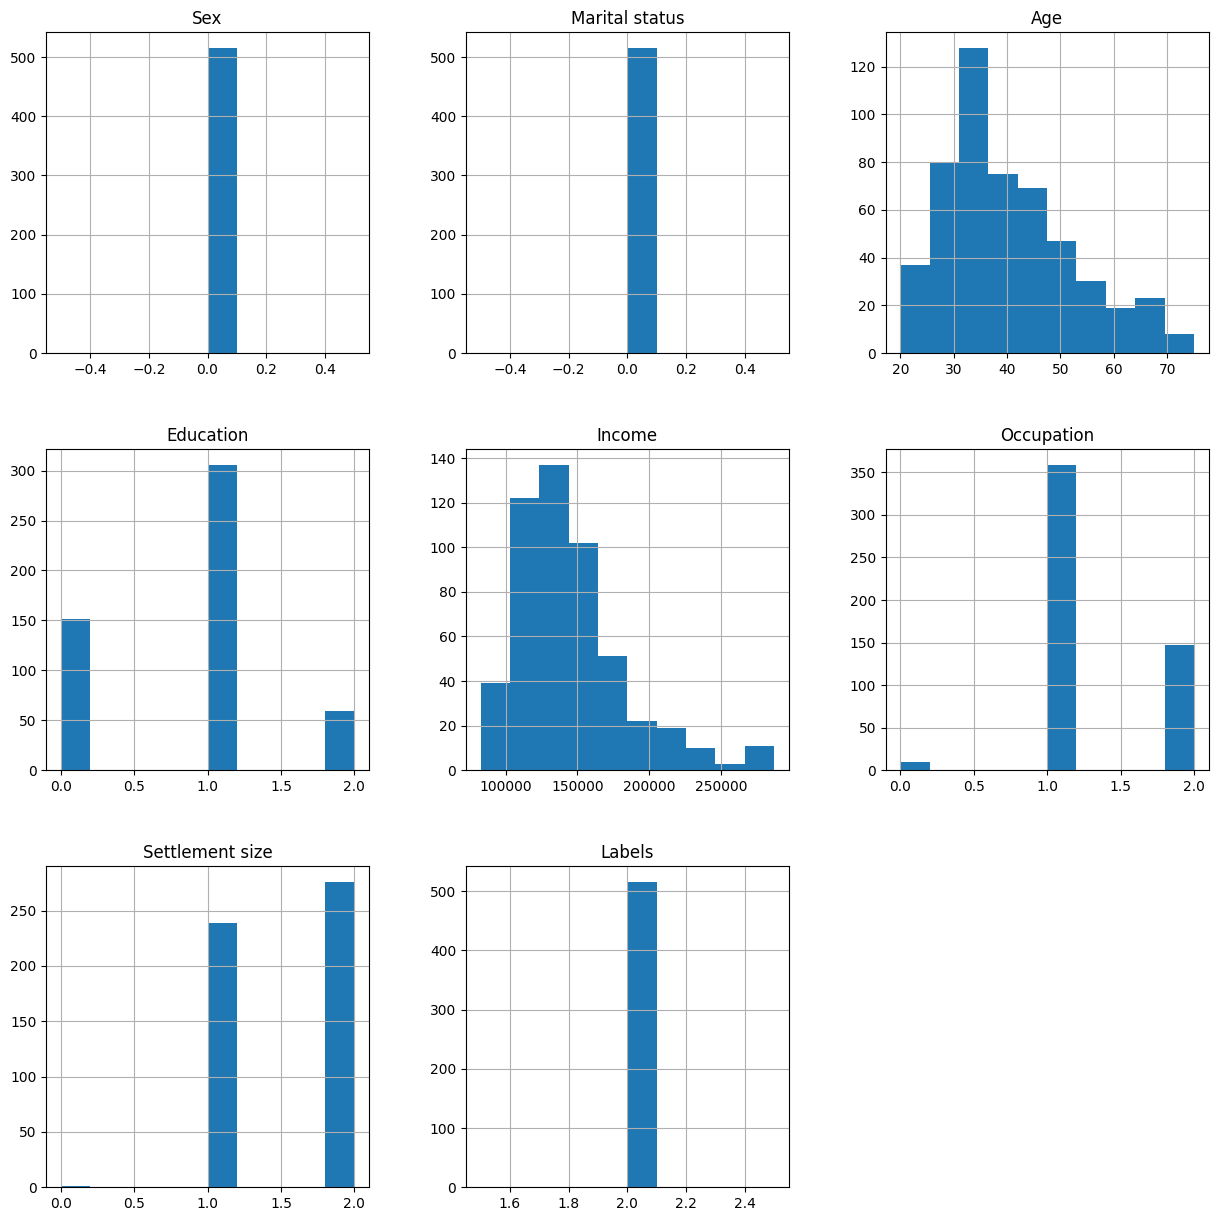

In [ ]:
results_df[results_df['Labels'] == 2].hist(figsize=(15,15));
plt.savefig('cluster4_results')

In [ ]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids, columns = results_df.columns[:7], index = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5'])

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
C0,3.885781e-16,1.332268e-15,0.246006,0.185304,0.030351,0.583042,0.484854
C1,1.000000e+00,1.000000e+00,0.400932,0.221445,0.001166,0.462386,0.371297
C2,2.553513e-15,1.720846e-15,0.273902,0.632752,0.766473,0.620076,0.525032
C3,-3.885781e-16,1.000000e+00,0.422827,0.466926,0.459144,0.502788,0.409658
C4,1.000000e+00,1.000000e+00,0.448426,0.579805,0.680782,0.498341,0.411539
C5,1.000000e+00,1.498801e-15,0.310861,0.185393,0.036517,0.536687,0.439125


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz


clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 5)
X_clusters = results_df.drop('Labels', axis=1)
y_clusters = results_df['Labels']

clf.fit(X_clusters, y_clusters)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = clf.predict(X_clusters)
print(classification_report(y_clusters, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       313
           1       1.00      1.00      1.00       429
           2       1.00      0.98      0.99       516
           3       1.00      1.00      1.00       257
           4       1.00      0.99      1.00       307
           5       1.00      1.00      1.00       178

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



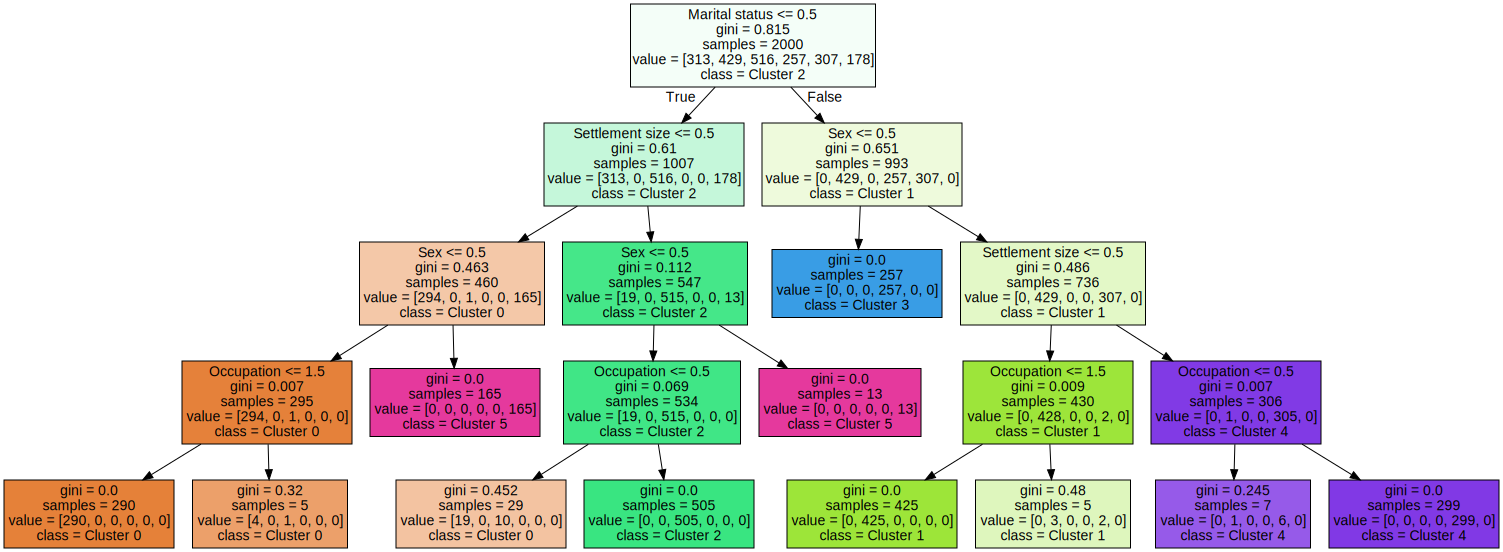

In [ ]:
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=results_df.columns[:7],
                                class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph
#plt.savefig('DecisionTree.png')